In [3]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("stats2.csv")
df.head()

,Att,Cmp,Pct,Yds,YPA,TD%,Int,Int%,Lg,Sack,Loss,Rate,TD
0,554,337,60.8,4132,7.5,5.4,14,2.5,65,23,217,91.4,30
1,451,257,57.0,3529,7.8,6.0,12,2.7,56,27,213,91.0,27
2,404,240,59.4,3199,7.9,7.4,19,4.7,74,23,191,89.7,30
3,463,257,55.5,3544,7.7,6.7,16,3.5,81,35,324,88.2,31
4,273,176,64.5,1795,6.6,5.5,9,3.3,71,15,100,87.8,15


In [5]:
train_x_df = df.drop(columns=["TD"])
train_x_df.head()

,Att,Cmp,Pct,Yds,YPA,TD%,Int,Int%,Lg,Sack,Loss,Rate
0,554,337,60.8,4132,7.5,5.4,14,2.5,65,23,217,91.4
1,451,257,57.0,3529,7.8,6.0,12,2.7,56,27,213,91.0
2,404,240,59.4,3199,7.9,7.4,19,4.7,74,23,191,89.7
3,463,257,55.5,3544,7.7,6.7,16,3.5,81,35,324,88.2
4,273,176,64.5,1795,6.6,5.5,9,3.3,71,15,100,87.8


In [6]:
X_train = train_x_df.values
X_train.shape
n_cols = X_train.shape[1]

In [7]:
train_y_df = df[['TD']]
train_y_df.head()

,TD
0,30
1,27
2,30
3,31
4,15


In [8]:
y_train = train_y_df.values 
y_train.shape

(2446, 1)

In [19]:
#create model
model = Sequential()
#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [21]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
#train model
history = model.fit(X_train, y_train, epochs=5000, shuffle=True, verbose=2, validation_split=0.25)

Train on 1834 samples, validate on 612 samples
Epoch 1/5000
 - 0s - loss: 1224.9870 - acc: 0.0507 - val_loss: 90.1233 - val_acc: 0.1569
Epoch 2/5000
 - 0s - loss: 39.7682 - acc: 0.1025 - val_loss: 29.2111 - val_acc: 0.1912
Epoch 3/5000
 - 0s - loss: 20.5887 - acc: 0.1581 - val_loss: 24.1520 - val_acc: 0.2222
Epoch 4/5000
 - 0s - loss: 14.7215 - acc: 0.1739 - val_loss: 12.3673 - val_acc: 0.2467
Epoch 5/5000
 - 0s - loss: 11.7444 - acc: 0.1876 - val_loss: 12.1632 - val_acc: 0.3088
Epoch 6/5000
 - 0s - loss: 11.1479 - acc: 0.2121 - val_loss: 9.2644 - val_acc: 0.3039
Epoch 7/5000
 - 0s - loss: 10.7921 - acc: 0.2372 - val_loss: 8.8681 - val_acc: 0.3268
Epoch 8/5000
 - 0s - loss: 10.9362 - acc: 0.2432 - val_loss: 11.0828 - val_acc: 0.3660
Epoch 9/5000
 - 0s - loss: 10.1044 - acc: 0.2475 - val_loss: 9.1612 - val_acc: 0.3301
Epoch 10/5000
 - 0s - loss: 9.9554 - acc: 0.2601 - val_loss: 8.4323 - val_acc: 0.3480
Epoch 11/5000
 - 0s - loss: 10.5348 - acc: 0.2606 - val_loss: 8.6507 - val_acc: 0.370

Epoch 96/5000
 - 0s - loss: 6.4337 - acc: 0.3293 - val_loss: 6.3929 - val_acc: 0.4592
Epoch 97/5000
 - 0s - loss: 7.0785 - acc: 0.3348 - val_loss: 4.8593 - val_acc: 0.5245
Epoch 98/5000
 - 0s - loss: 5.4821 - acc: 0.3462 - val_loss: 4.9264 - val_acc: 0.5212
Epoch 99/5000
 - 0s - loss: 6.4543 - acc: 0.3299 - val_loss: 4.6442 - val_acc: 0.5359
Epoch 100/5000
 - 0s - loss: 6.5664 - acc: 0.3310 - val_loss: 7.1092 - val_acc: 0.4820
Epoch 101/5000
 - 0s - loss: 8.1858 - acc: 0.3048 - val_loss: 5.6892 - val_acc: 0.4951
Epoch 102/5000
 - 0s - loss: 6.9627 - acc: 0.3293 - val_loss: 4.9967 - val_acc: 0.5458
Epoch 103/5000
 - 0s - loss: 6.4223 - acc: 0.3321 - val_loss: 4.9880 - val_acc: 0.5229
Epoch 104/5000
 - 0s - loss: 5.6889 - acc: 0.3604 - val_loss: 10.5715 - val_acc: 0.3791
Epoch 105/5000
 - 0s - loss: 5.8603 - acc: 0.3484 - val_loss: 5.2101 - val_acc: 0.4820
Epoch 106/5000
 - 0s - loss: 4.9490 - acc: 0.3571 - val_loss: 6.2263 - val_acc: 0.4395
Epoch 107/5000
 - 0s - loss: 5.5015 - acc: 0.3

 - 0s - loss: 2.9618 - acc: 0.3441 - val_loss: 3.0109 - val_acc: 0.5049
Epoch 191/5000
 - 0s - loss: 2.4096 - acc: 0.3888 - val_loss: 2.5775 - val_acc: 0.5033
Epoch 192/5000
 - 0s - loss: 2.1559 - acc: 0.4198 - val_loss: 2.6184 - val_acc: 0.5294
Epoch 193/5000
 - 0s - loss: 2.2436 - acc: 0.4111 - val_loss: 2.5008 - val_acc: 0.5163
Epoch 194/5000
 - 0s - loss: 2.4890 - acc: 0.3893 - val_loss: 4.7919 - val_acc: 0.4526
Epoch 195/5000
 - 0s - loss: 3.9629 - acc: 0.3364 - val_loss: 4.5162 - val_acc: 0.4641
Epoch 196/5000
 - 0s - loss: 2.5743 - acc: 0.3937 - val_loss: 5.0889 - val_acc: 0.4477
Epoch 197/5000
 - 0s - loss: 2.9739 - acc: 0.3686 - val_loss: 4.0858 - val_acc: 0.4771
Epoch 198/5000
 - 0s - loss: 2.0555 - acc: 0.4215 - val_loss: 2.2355 - val_acc: 0.5441
Epoch 199/5000
 - 0s - loss: 2.5517 - acc: 0.3931 - val_loss: 2.3756 - val_acc: 0.5245
Epoch 200/5000
 - 0s - loss: 2.1592 - acc: 0.4313 - val_loss: 2.9437 - val_acc: 0.5000
Epoch 201/5000
 - 0s - loss: 1.7517 - acc: 0.4607 - val_lo

Epoch 285/5000
 - 0s - loss: 1.6881 - acc: 0.4122 - val_loss: 1.2926 - val_acc: 0.5605
Epoch 286/5000
 - 0s - loss: 1.4776 - acc: 0.4177 - val_loss: 3.2385 - val_acc: 0.4984
Epoch 287/5000
 - 0s - loss: 1.2544 - acc: 0.4477 - val_loss: 1.3057 - val_acc: 0.5735
Epoch 288/5000
 - 0s - loss: 1.0891 - acc: 0.4853 - val_loss: 1.3578 - val_acc: 0.6160
Epoch 289/5000
 - 0s - loss: 1.1456 - acc: 0.4738 - val_loss: 1.9215 - val_acc: 0.5474
Epoch 290/5000
 - 0s - loss: 1.2909 - acc: 0.4471 - val_loss: 1.3979 - val_acc: 0.5572
Epoch 291/5000
 - 0s - loss: 0.9727 - acc: 0.4913 - val_loss: 1.5712 - val_acc: 0.5948
Epoch 292/5000
 - 0s - loss: 1.2743 - acc: 0.4618 - val_loss: 3.7065 - val_acc: 0.4624
Epoch 293/5000
 - 0s - loss: 1.4516 - acc: 0.4700 - val_loss: 1.5340 - val_acc: 0.5817
Epoch 294/5000
 - 0s - loss: 1.1096 - acc: 0.4836 - val_loss: 1.1605 - val_acc: 0.6307
Epoch 295/5000
 - 0s - loss: 0.9732 - acc: 0.5055 - val_loss: 1.2144 - val_acc: 0.5719
Epoch 296/5000
 - 0s - loss: 1.7281 - acc: 

Epoch 380/5000
 - 0s - loss: 0.8846 - acc: 0.5284 - val_loss: 2.2526 - val_acc: 0.4281
Epoch 381/5000
 - 0s - loss: 0.9685 - acc: 0.4706 - val_loss: 1.2612 - val_acc: 0.5310
Epoch 382/5000
 - 0s - loss: 1.0334 - acc: 0.4558 - val_loss: 1.4316 - val_acc: 0.5310
Epoch 383/5000
 - 0s - loss: 0.7408 - acc: 0.5207 - val_loss: 1.9550 - val_acc: 0.4853
Epoch 384/5000
 - 0s - loss: 1.5400 - acc: 0.4133 - val_loss: 2.2675 - val_acc: 0.4379
Epoch 385/5000
 - 0s - loss: 0.9993 - acc: 0.4956 - val_loss: 0.8963 - val_acc: 0.6111
Epoch 386/5000
 - 0s - loss: 0.7330 - acc: 0.5344 - val_loss: 1.0102 - val_acc: 0.5507
Epoch 387/5000
 - 0s - loss: 1.2508 - acc: 0.4438 - val_loss: 0.9794 - val_acc: 0.6242
Epoch 388/5000
 - 0s - loss: 0.6690 - acc: 0.5556 - val_loss: 0.9794 - val_acc: 0.5768
Epoch 389/5000
 - 0s - loss: 0.7764 - acc: 0.5240 - val_loss: 1.0458 - val_acc: 0.6438
Epoch 390/5000
 - 0s - loss: 0.6675 - acc: 0.5556 - val_loss: 0.8809 - val_acc: 0.6111
Epoch 391/5000
 - 0s - loss: 0.5880 - acc: 

Epoch 475/5000
 - 0s - loss: 0.4889 - acc: 0.6101 - val_loss: 0.7839 - val_acc: 0.6552
Epoch 476/5000
 - 0s - loss: 1.6567 - acc: 0.4477 - val_loss: 2.0594 - val_acc: 0.4788
Epoch 477/5000
 - 0s - loss: 2.0257 - acc: 0.3795 - val_loss: 0.7605 - val_acc: 0.6650
Epoch 478/5000
 - 0s - loss: 0.5909 - acc: 0.5823 - val_loss: 1.1053 - val_acc: 0.5376
Epoch 479/5000
 - 0s - loss: 0.7204 - acc: 0.5469 - val_loss: 0.7402 - val_acc: 0.6454
Epoch 480/5000
 - 0s - loss: 0.5907 - acc: 0.5720 - val_loss: 1.5017 - val_acc: 0.5752
Epoch 481/5000
 - 0s - loss: 0.7281 - acc: 0.5338 - val_loss: 1.1108 - val_acc: 0.5850
Epoch 482/5000
 - 0s - loss: 0.6587 - acc: 0.5371 - val_loss: 0.9525 - val_acc: 0.6160
Epoch 483/5000
 - 0s - loss: 0.6717 - acc: 0.5513 - val_loss: 0.6943 - val_acc: 0.6699
Epoch 484/5000
 - 0s - loss: 0.6037 - acc: 0.5851 - val_loss: 0.7660 - val_acc: 0.7042
Epoch 485/5000
 - 0s - loss: 0.5036 - acc: 0.6145 - val_loss: 0.9896 - val_acc: 0.5572
Epoch 486/5000
 - 0s - loss: 0.4790 - acc: 

 - 0s - loss: 0.4183 - acc: 0.6407 - val_loss: 0.6344 - val_acc: 0.6585
Epoch 570/5000
 - 0s - loss: 0.8483 - acc: 0.5480 - val_loss: 0.7776 - val_acc: 0.5882
Epoch 571/5000
 - 0s - loss: 0.6171 - acc: 0.5671 - val_loss: 0.9719 - val_acc: 0.5425
Epoch 572/5000
 - 0s - loss: 0.3858 - acc: 0.6767 - val_loss: 0.6243 - val_acc: 0.6863
Epoch 573/5000
 - 0s - loss: 0.5328 - acc: 0.6074 - val_loss: 0.9253 - val_acc: 0.5310
Epoch 574/5000
 - 0s - loss: 0.3819 - acc: 0.6636 - val_loss: 0.8876 - val_acc: 0.6046
Epoch 575/5000
 - 0s - loss: 0.5102 - acc: 0.5769 - val_loss: 0.8244 - val_acc: 0.6078
Epoch 576/5000
 - 0s - loss: 0.4314 - acc: 0.6412 - val_loss: 0.6162 - val_acc: 0.6242
Epoch 577/5000
 - 0s - loss: 0.5510 - acc: 0.5911 - val_loss: 1.2206 - val_acc: 0.6029
Epoch 578/5000
 - 0s - loss: 0.4552 - acc: 0.6150 - val_loss: 1.2011 - val_acc: 0.5523
Epoch 579/5000
 - 0s - loss: 0.4500 - acc: 0.6134 - val_loss: 0.6958 - val_acc: 0.5850
Epoch 580/5000
 - 0s - loss: 0.4117 - acc: 0.6456 - val_lo

Epoch 664/5000
 - 0s - loss: 0.8505 - acc: 0.5038 - val_loss: 0.7887 - val_acc: 0.6520
Epoch 665/5000
 - 0s - loss: 0.4014 - acc: 0.6494 - val_loss: 0.7041 - val_acc: 0.6046
Epoch 666/5000
 - 0s - loss: 0.3662 - acc: 0.6827 - val_loss: 0.5671 - val_acc: 0.7255
Epoch 667/5000
 - 0s - loss: 0.5169 - acc: 0.6080 - val_loss: 0.5676 - val_acc: 0.6961
Epoch 668/5000
 - 0s - loss: 0.3685 - acc: 0.6897 - val_loss: 0.5801 - val_acc: 0.7075
Epoch 669/5000
 - 0s - loss: 0.3151 - acc: 0.7061 - val_loss: 0.5541 - val_acc: 0.6961
Epoch 670/5000
 - 0s - loss: 0.6566 - acc: 0.5578 - val_loss: 1.5365 - val_acc: 0.4673
Epoch 671/5000
 - 0s - loss: 0.7253 - acc: 0.5273 - val_loss: 0.5857 - val_acc: 0.7141
Epoch 672/5000
 - 0s - loss: 0.3052 - acc: 0.7143 - val_loss: 0.5501 - val_acc: 0.6961
Epoch 673/5000
 - 0s - loss: 0.4060 - acc: 0.6429 - val_loss: 0.8996 - val_acc: 0.5556
Epoch 674/5000
 - 0s - loss: 0.5922 - acc: 0.5682 - val_loss: 0.6071 - val_acc: 0.7304
Epoch 675/5000
 - 0s - loss: 0.3178 - acc: 

Epoch 759/5000
 - 0s - loss: 0.3592 - acc: 0.6570 - val_loss: 0.5667 - val_acc: 0.7141
Epoch 760/5000
 - 0s - loss: 0.3317 - acc: 0.6914 - val_loss: 0.4996 - val_acc: 0.7353
Epoch 761/5000
 - 0s - loss: 0.3645 - acc: 0.6767 - val_loss: 0.8007 - val_acc: 0.5703
Epoch 762/5000
 - 0s - loss: 0.6621 - acc: 0.5420 - val_loss: 0.5850 - val_acc: 0.6471
Epoch 763/5000
 - 0s - loss: 0.5985 - acc: 0.5752 - val_loss: 0.6897 - val_acc: 0.5915
Epoch 764/5000
 - 0s - loss: 0.3382 - acc: 0.6750 - val_loss: 0.7963 - val_acc: 0.6307
Epoch 765/5000
 - 0s - loss: 0.4082 - acc: 0.6412 - val_loss: 0.9662 - val_acc: 0.6324
Epoch 766/5000
 - 0s - loss: 0.4846 - acc: 0.5960 - val_loss: 0.7125 - val_acc: 0.5817
Epoch 767/5000
 - 0s - loss: 0.5645 - acc: 0.5654 - val_loss: 0.6122 - val_acc: 0.6111
Epoch 768/5000
 - 0s - loss: 0.3894 - acc: 0.6674 - val_loss: 1.0021 - val_acc: 0.4935
Epoch 769/5000
 - 0s - loss: 0.9888 - acc: 0.5000 - val_loss: 0.7029 - val_acc: 0.5784
Epoch 770/5000
 - 0s - loss: 0.3828 - acc: 

 - 0s - loss: 0.4518 - acc: 0.6183 - val_loss: 0.5125 - val_acc: 0.7092
Epoch 854/5000
 - 0s - loss: 0.3033 - acc: 0.7192 - val_loss: 0.4940 - val_acc: 0.7173
Epoch 855/5000
 - 0s - loss: 0.3479 - acc: 0.6887 - val_loss: 0.9327 - val_acc: 0.5948
Epoch 856/5000
 - 0s - loss: 0.4339 - acc: 0.6260 - val_loss: 0.6465 - val_acc: 0.6961
Epoch 857/5000
 - 0s - loss: 0.3055 - acc: 0.7165 - val_loss: 0.7208 - val_acc: 0.6176
Epoch 858/5000
 - 0s - loss: 0.3405 - acc: 0.6865 - val_loss: 0.5886 - val_acc: 0.7059
Epoch 859/5000
 - 0s - loss: 0.5382 - acc: 0.5932 - val_loss: 1.7317 - val_acc: 0.4559
Epoch 860/5000
 - 0s - loss: 0.4949 - acc: 0.6025 - val_loss: 0.4866 - val_acc: 0.7451
Epoch 861/5000
 - 0s - loss: 0.2715 - acc: 0.7383 - val_loss: 0.4751 - val_acc: 0.7075
Epoch 862/5000
 - 0s - loss: 0.4623 - acc: 0.6336 - val_loss: 0.5232 - val_acc: 0.6699
Epoch 863/5000
 - 0s - loss: 0.3985 - acc: 0.6510 - val_loss: 1.4426 - val_acc: 0.4935
Epoch 864/5000
 - 0s - loss: 0.3001 - acc: 0.7028 - val_lo

Epoch 948/5000
 - 0s - loss: 0.2831 - acc: 0.7132 - val_loss: 0.5096 - val_acc: 0.6454
Epoch 949/5000
 - 0s - loss: 0.2876 - acc: 0.6996 - val_loss: 0.6085 - val_acc: 0.6422
Epoch 950/5000
 - 0s - loss: 0.3807 - acc: 0.6532 - val_loss: 1.5348 - val_acc: 0.5621
Epoch 951/5000
 - 0s - loss: 0.4358 - acc: 0.5911 - val_loss: 0.4445 - val_acc: 0.7696
Epoch 952/5000
 - 0s - loss: 0.2975 - acc: 0.7023 - val_loss: 0.4953 - val_acc: 0.6324
Epoch 953/5000
 - 0s - loss: 0.3275 - acc: 0.7088 - val_loss: 0.4830 - val_acc: 0.6748
Epoch 954/5000
 - 0s - loss: 0.5123 - acc: 0.6358 - val_loss: 0.5524 - val_acc: 0.7255
Epoch 955/5000
 - 0s - loss: 0.3985 - acc: 0.6483 - val_loss: 1.2007 - val_acc: 0.5131
Epoch 956/5000
 - 0s - loss: 0.5233 - acc: 0.5785 - val_loss: 0.5088 - val_acc: 0.6405
Epoch 957/5000
 - 0s - loss: 0.4802 - acc: 0.6189 - val_loss: 0.4929 - val_acc: 0.7337
Epoch 958/5000
 - 0s - loss: 0.5928 - acc: 0.5949 - val_loss: 0.4449 - val_acc: 0.7565
Epoch 959/5000
 - 0s - loss: 0.2301 - acc: 

Epoch 1042/5000
 - 0s - loss: 0.2246 - acc: 0.7688 - val_loss: 0.3224 - val_acc: 0.7908
Epoch 1043/5000
 - 0s - loss: 0.4880 - acc: 0.6205 - val_loss: 0.9553 - val_acc: 0.5310
Epoch 1044/5000
 - 0s - loss: 0.3685 - acc: 0.6756 - val_loss: 0.9492 - val_acc: 0.5310
Epoch 1045/5000
 - 0s - loss: 0.3333 - acc: 0.6652 - val_loss: 0.4356 - val_acc: 0.6830
Epoch 1046/5000
 - 0s - loss: 0.2092 - acc: 0.7781 - val_loss: 0.3678 - val_acc: 0.7925
Epoch 1047/5000
 - 0s - loss: 0.2500 - acc: 0.7486 - val_loss: 0.3563 - val_acc: 0.7745
Epoch 1048/5000
 - 0s - loss: 0.3777 - acc: 0.6467 - val_loss: 0.4625 - val_acc: 0.7092
Epoch 1049/5000
 - 0s - loss: 0.2476 - acc: 0.7388 - val_loss: 0.3870 - val_acc: 0.7614
Epoch 1050/5000
 - 0s - loss: 0.2752 - acc: 0.7186 - val_loss: 0.4532 - val_acc: 0.6699
Epoch 1051/5000
 - 0s - loss: 0.4314 - acc: 0.6576 - val_loss: 1.7806 - val_acc: 0.5229
Epoch 1052/5000
 - 0s - loss: 0.5021 - acc: 0.5818 - val_loss: 0.3252 - val_acc: 0.7827
Epoch 1053/5000
 - 0s - loss: 0.

 - 0s - loss: 0.1881 - acc: 0.7961 - val_loss: 0.6250 - val_acc: 0.6373
Epoch 1136/5000
 - 0s - loss: 0.1928 - acc: 0.7874 - val_loss: 0.3273 - val_acc: 0.7712
Epoch 1137/5000
 - 0s - loss: 0.2401 - acc: 0.7356 - val_loss: 0.2929 - val_acc: 0.7745
Epoch 1138/5000
 - 0s - loss: 0.2792 - acc: 0.7028 - val_loss: 0.2947 - val_acc: 0.7843
Epoch 1139/5000
 - 0s - loss: 0.1782 - acc: 0.8070 - val_loss: 0.4259 - val_acc: 0.7582
Epoch 1140/5000
 - 0s - loss: 0.3691 - acc: 0.6707 - val_loss: 0.3197 - val_acc: 0.7647
Epoch 1141/5000
 - 0s - loss: 0.1950 - acc: 0.7754 - val_loss: 0.2858 - val_acc: 0.8072
Epoch 1142/5000
 - 0s - loss: 0.4387 - acc: 0.6330 - val_loss: 0.7839 - val_acc: 0.6340
Epoch 1143/5000
 - 0s - loss: 0.2837 - acc: 0.7290 - val_loss: 0.4044 - val_acc: 0.7712
Epoch 1144/5000
 - 0s - loss: 0.2090 - acc: 0.7541 - val_loss: 0.5849 - val_acc: 0.5948
Epoch 1145/5000
 - 0s - loss: 0.3199 - acc: 0.6854 - val_loss: 1.3075 - val_acc: 0.5605
Epoch 1146/5000
 - 0s - loss: 0.2345 - acc: 0.76

Epoch 1229/5000
 - 0s - loss: 0.3342 - acc: 0.6565 - val_loss: 0.6103 - val_acc: 0.6454
Epoch 1230/5000
 - 0s - loss: 0.3178 - acc: 0.6658 - val_loss: 0.2449 - val_acc: 0.8235
Epoch 1231/5000
 - 0s - loss: 0.1748 - acc: 0.7955 - val_loss: 0.3105 - val_acc: 0.8088
Epoch 1232/5000
 - 0s - loss: 0.1633 - acc: 0.8206 - val_loss: 0.2574 - val_acc: 0.8219
Epoch 1233/5000
 - 0s - loss: 0.1689 - acc: 0.8190 - val_loss: 0.2591 - val_acc: 0.8072
Epoch 1234/5000
 - 0s - loss: 0.2253 - acc: 0.7628 - val_loss: 0.3759 - val_acc: 0.6667
Epoch 1235/5000
 - 0s - loss: 0.4072 - acc: 0.6499 - val_loss: 0.5049 - val_acc: 0.6193
Epoch 1236/5000
 - 0s - loss: 0.1907 - acc: 0.7906 - val_loss: 0.2677 - val_acc: 0.8039
Epoch 1237/5000
 - 0s - loss: 0.2046 - acc: 0.7852 - val_loss: 0.2633 - val_acc: 0.7876
Epoch 1238/5000
 - 0s - loss: 0.3371 - acc: 0.6679 - val_loss: 0.4329 - val_acc: 0.7418
Epoch 1239/5000
 - 0s - loss: 0.2111 - acc: 0.7710 - val_loss: 0.2573 - val_acc: 0.8464
Epoch 1240/5000
 - 0s - loss: 0.

 - 0s - loss: 0.2006 - acc: 0.7786 - val_loss: 0.7100 - val_acc: 0.6520
Epoch 1323/5000
 - 0s - loss: 0.1435 - acc: 0.8517 - val_loss: 0.2398 - val_acc: 0.8693
Epoch 1324/5000
 - 0s - loss: 0.2346 - acc: 0.7634 - val_loss: 0.8431 - val_acc: 0.5784
Epoch 1325/5000
 - 0s - loss: 0.2461 - acc: 0.7612 - val_loss: 0.2635 - val_acc: 0.8137
Epoch 1326/5000
 - 0s - loss: 0.1635 - acc: 0.8222 - val_loss: 0.4586 - val_acc: 0.7059
Epoch 1327/5000
 - 0s - loss: 0.2234 - acc: 0.7541 - val_loss: 0.2646 - val_acc: 0.8644
Epoch 1328/5000
 - 0s - loss: 0.1305 - acc: 0.8631 - val_loss: 0.3535 - val_acc: 0.7190
Epoch 1329/5000
 - 0s - loss: 0.1615 - acc: 0.8201 - val_loss: 0.2354 - val_acc: 0.8562
Epoch 1330/5000
 - 0s - loss: 0.2524 - acc: 0.7154 - val_loss: 0.2662 - val_acc: 0.8186
Epoch 1331/5000
 - 0s - loss: 0.1907 - acc: 0.7988 - val_loss: 0.5531 - val_acc: 0.6944
Epoch 1332/5000
 - 0s - loss: 0.1679 - acc: 0.8261 - val_loss: 0.2450 - val_acc: 0.8121
Epoch 1333/5000
 - 0s - loss: 0.1537 - acc: 0.83

Epoch 1416/5000
 - 0s - loss: 0.2208 - acc: 0.7726 - val_loss: 0.3351 - val_acc: 0.7484
Epoch 1417/5000
 - 0s - loss: 0.1459 - acc: 0.8391 - val_loss: 0.2702 - val_acc: 0.8415
Epoch 1418/5000
 - 0s - loss: 0.2211 - acc: 0.7683 - val_loss: 0.7706 - val_acc: 0.6340
Epoch 1419/5000
 - 0s - loss: 0.3872 - acc: 0.6625 - val_loss: 0.2820 - val_acc: 0.8105
Epoch 1420/5000
 - 0s - loss: 0.3146 - acc: 0.6996 - val_loss: 0.5485 - val_acc: 0.6601
Epoch 1421/5000
 - 0s - loss: 0.2258 - acc: 0.7595 - val_loss: 0.2380 - val_acc: 0.8252
Epoch 1422/5000
 - 0s - loss: 0.1778 - acc: 0.8168 - val_loss: 0.7153 - val_acc: 0.6732
Epoch 1423/5000
 - 0s - loss: 0.5644 - acc: 0.6363 - val_loss: 0.3306 - val_acc: 0.7190
Epoch 1424/5000
 - 0s - loss: 0.1759 - acc: 0.7923 - val_loss: 0.2402 - val_acc: 0.8415
Epoch 1425/5000
 - 0s - loss: 0.1174 - acc: 0.8828 - val_loss: 0.3261 - val_acc: 0.7157
Epoch 1426/5000
 - 0s - loss: 0.1386 - acc: 0.8430 - val_loss: 0.2503 - val_acc: 0.8611
Epoch 1427/5000
 - 0s - loss: 0.

 - 0s - loss: 0.1398 - acc: 0.8435 - val_loss: 0.3553 - val_acc: 0.7696
Epoch 1510/5000
 - 0s - loss: 0.1377 - acc: 0.8637 - val_loss: 0.2659 - val_acc: 0.8546
Epoch 1511/5000
 - 0s - loss: 0.1491 - acc: 0.8375 - val_loss: 0.4714 - val_acc: 0.7451
Epoch 1512/5000
 - 0s - loss: 0.1537 - acc: 0.8441 - val_loss: 0.2122 - val_acc: 0.8775
Epoch 1513/5000
 - 0s - loss: 0.1322 - acc: 0.8604 - val_loss: 0.8523 - val_acc: 0.6454
Epoch 1514/5000
 - 0s - loss: 0.1874 - acc: 0.8015 - val_loss: 0.2530 - val_acc: 0.8431
Epoch 1515/5000
 - 0s - loss: 0.2021 - acc: 0.7961 - val_loss: 0.2454 - val_acc: 0.8121
Epoch 1516/5000
 - 0s - loss: 0.1407 - acc: 0.8419 - val_loss: 0.2069 - val_acc: 0.8676
Epoch 1517/5000
 - 0s - loss: 0.1003 - acc: 0.8931 - val_loss: 0.1965 - val_acc: 0.8873
Epoch 1518/5000
 - 0s - loss: 0.3035 - acc: 0.7023 - val_loss: 0.3280 - val_acc: 0.7614
Epoch 1519/5000
 - 0s - loss: 0.3035 - acc: 0.7181 - val_loss: 0.2347 - val_acc: 0.8562
Epoch 1520/5000
 - 0s - loss: 0.1218 - acc: 0.86

Epoch 1603/5000
 - 0s - loss: 0.1822 - acc: 0.7961 - val_loss: 0.2221 - val_acc: 0.8889
Epoch 1604/5000
 - 0s - loss: 0.1249 - acc: 0.8702 - val_loss: 0.2388 - val_acc: 0.8170
Epoch 1605/5000
 - 0s - loss: 0.1397 - acc: 0.8544 - val_loss: 0.2511 - val_acc: 0.8382
Epoch 1606/5000
 - 0s - loss: 0.1230 - acc: 0.8697 - val_loss: 0.5823 - val_acc: 0.6536
Epoch 1607/5000
 - 0s - loss: 0.5136 - acc: 0.5949 - val_loss: 0.4136 - val_acc: 0.7157
Epoch 1608/5000
 - 0s - loss: 0.1729 - acc: 0.7988 - val_loss: 0.2019 - val_acc: 0.8791
Epoch 1609/5000
 - 0s - loss: 0.1517 - acc: 0.8435 - val_loss: 0.3733 - val_acc: 0.6797
Epoch 1610/5000
 - 0s - loss: 0.2161 - acc: 0.7846 - val_loss: 0.4074 - val_acc: 0.7288
Epoch 1611/5000
 - 0s - loss: 0.1055 - acc: 0.8991 - val_loss: 0.6170 - val_acc: 0.7402
Epoch 1612/5000
 - 0s - loss: 0.1854 - acc: 0.8157 - val_loss: 0.2563 - val_acc: 0.7696
Epoch 1613/5000
 - 0s - loss: 0.1424 - acc: 0.8435 - val_loss: 0.1950 - val_acc: 0.8840
Epoch 1614/5000
 - 0s - loss: 0.

 - 0s - loss: 0.2560 - acc: 0.7748 - val_loss: 0.2866 - val_acc: 0.7778
Epoch 1697/5000
 - 0s - loss: 0.2149 - acc: 0.7754 - val_loss: 0.2050 - val_acc: 0.8611
Epoch 1698/5000
 - 0s - loss: 0.1416 - acc: 0.8397 - val_loss: 0.2715 - val_acc: 0.8268
Epoch 1699/5000
 - 0s - loss: 0.1891 - acc: 0.7966 - val_loss: 0.9273 - val_acc: 0.6389
Epoch 1700/5000
 - 0s - loss: 0.3514 - acc: 0.6832 - val_loss: 0.3136 - val_acc: 0.7467
Epoch 1701/5000
 - 0s - loss: 0.2497 - acc: 0.7306 - val_loss: 0.2852 - val_acc: 0.8399
Epoch 1702/5000
 - 0s - loss: 0.1242 - acc: 0.8626 - val_loss: 0.2528 - val_acc: 0.7941
Epoch 1703/5000
 - 0s - loss: 0.2290 - acc: 0.7574 - val_loss: 0.2082 - val_acc: 0.8660
Epoch 1704/5000
 - 0s - loss: 0.1071 - acc: 0.8828 - val_loss: 0.2355 - val_acc: 0.8627
Epoch 1705/5000
 - 0s - loss: 0.0911 - acc: 0.9057 - val_loss: 0.2187 - val_acc: 0.8072
Epoch 1706/5000
 - 0s - loss: 0.1066 - acc: 0.8790 - val_loss: 0.4230 - val_acc: 0.7157
Epoch 1707/5000
 - 0s - loss: 0.1553 - acc: 0.82

Epoch 1790/5000
 - 0s - loss: 0.1875 - acc: 0.7792 - val_loss: 0.2299 - val_acc: 0.8252
Epoch 1791/5000
 - 0s - loss: 0.0987 - acc: 0.9029 - val_loss: 0.1774 - val_acc: 0.8856
Epoch 1792/5000
 - 0s - loss: 0.2331 - acc: 0.7688 - val_loss: 0.2353 - val_acc: 0.8546
Epoch 1793/5000
 - 0s - loss: 0.0938 - acc: 0.9084 - val_loss: 0.1965 - val_acc: 0.8709
Epoch 1794/5000
 - 0s - loss: 0.1298 - acc: 0.8435 - val_loss: 0.2054 - val_acc: 0.8529
Epoch 1795/5000
 - 0s - loss: 0.1007 - acc: 0.8953 - val_loss: 0.2083 - val_acc: 0.8807
Epoch 1796/5000
 - 0s - loss: 0.1796 - acc: 0.8141 - val_loss: 0.1825 - val_acc: 0.9101
Epoch 1797/5000
 - 0s - loss: 0.1647 - acc: 0.8113 - val_loss: 0.2107 - val_acc: 0.8350
Epoch 1798/5000
 - 0s - loss: 0.1187 - acc: 0.8686 - val_loss: 0.2845 - val_acc: 0.7614
Epoch 1799/5000
 - 0s - loss: 0.3061 - acc: 0.6739 - val_loss: 0.2358 - val_acc: 0.8546
Epoch 1800/5000
 - 0s - loss: 0.1436 - acc: 0.8370 - val_loss: 0.2335 - val_acc: 0.8742
Epoch 1801/5000
 - 0s - loss: 0.

Epoch 1884/5000
 - 0s - loss: 0.1271 - acc: 0.8659 - val_loss: 0.1969 - val_acc: 0.8693
Epoch 1885/5000
 - 0s - loss: 0.1537 - acc: 0.8419 - val_loss: 0.4937 - val_acc: 0.6781
Epoch 1886/5000
 - 0s - loss: 0.2322 - acc: 0.7421 - val_loss: 0.4246 - val_acc: 0.7435
Epoch 1887/5000
 - 0s - loss: 0.1941 - acc: 0.7852 - val_loss: 0.2391 - val_acc: 0.8088
Epoch 1888/5000
 - 0s - loss: 0.1909 - acc: 0.7841 - val_loss: 0.1844 - val_acc: 0.8840
Epoch 1889/5000
 - 0s - loss: 0.1564 - acc: 0.8255 - val_loss: 0.3288 - val_acc: 0.7304
Epoch 1890/5000
 - 0s - loss: 0.1255 - acc: 0.8550 - val_loss: 0.2064 - val_acc: 0.8840
Epoch 1891/5000
 - 0s - loss: 0.1289 - acc: 0.8593 - val_loss: 0.1941 - val_acc: 0.8464
Epoch 1892/5000
 - 0s - loss: 0.1793 - acc: 0.7988 - val_loss: 0.2603 - val_acc: 0.8464
Epoch 1893/5000
 - 0s - loss: 0.1201 - acc: 0.8691 - val_loss: 0.1954 - val_acc: 0.8693
Epoch 1894/5000
 - 0s - loss: 0.0890 - acc: 0.9226 - val_loss: 0.1670 - val_acc: 0.8856
Epoch 1895/5000
 - 0s - loss: 0.

 - 0s - loss: 0.1026 - acc: 0.8969 - val_loss: 0.2283 - val_acc: 0.8529
Epoch 1978/5000
 - 0s - loss: 0.1758 - acc: 0.8053 - val_loss: 0.2562 - val_acc: 0.8464
Epoch 1979/5000
 - 0s - loss: 0.1350 - acc: 0.8566 - val_loss: 0.1908 - val_acc: 0.8464
Epoch 1980/5000
 - 0s - loss: 0.1747 - acc: 0.8113 - val_loss: 0.2907 - val_acc: 0.7892
Epoch 1981/5000
 - 0s - loss: 0.1316 - acc: 0.8490 - val_loss: 0.1521 - val_acc: 0.9069
Epoch 1982/5000
 - 0s - loss: 0.0856 - acc: 0.9155 - val_loss: 0.3109 - val_acc: 0.7794
Epoch 1983/5000
 - 0s - loss: 0.0748 - acc: 0.9389 - val_loss: 0.1730 - val_acc: 0.8922
Epoch 1984/5000
 - 0s - loss: 0.1078 - acc: 0.8844 - val_loss: 0.2694 - val_acc: 0.7288
Epoch 1985/5000
 - 0s - loss: 0.2376 - acc: 0.7252 - val_loss: 0.1888 - val_acc: 0.8578
Epoch 1986/5000
 - 0s - loss: 0.0796 - acc: 0.9313 - val_loss: 0.1974 - val_acc: 0.8284
Epoch 1987/5000
 - 0s - loss: 0.1161 - acc: 0.8735 - val_loss: 0.1488 - val_acc: 0.9020
Epoch 1988/5000
 - 0s - loss: 0.0868 - acc: 0.91

Epoch 2071/5000
 - 0s - loss: 0.0960 - acc: 0.9089 - val_loss: 0.2569 - val_acc: 0.8448
Epoch 2072/5000
 - 0s - loss: 0.0961 - acc: 0.8991 - val_loss: 0.3108 - val_acc: 0.7990
Epoch 2073/5000
 - 0s - loss: 0.1203 - acc: 0.8691 - val_loss: 0.3096 - val_acc: 0.7614
Epoch 2074/5000
 - 0s - loss: 0.0943 - acc: 0.9046 - val_loss: 0.1986 - val_acc: 0.8693
Epoch 2075/5000
 - 0s - loss: 0.0957 - acc: 0.9095 - val_loss: 0.1560 - val_acc: 0.9134
Epoch 2076/5000
 - 0s - loss: 0.1646 - acc: 0.8217 - val_loss: 0.2541 - val_acc: 0.7958
Epoch 2077/5000
 - 0s - loss: 0.1029 - acc: 0.8926 - val_loss: 0.2726 - val_acc: 0.7582
Epoch 2078/5000
 - 0s - loss: 0.1752 - acc: 0.8053 - val_loss: 0.2154 - val_acc: 0.8399
Epoch 2079/5000
 - 0s - loss: 0.1998 - acc: 0.7699 - val_loss: 0.2920 - val_acc: 0.7222
Epoch 2080/5000
 - 0s - loss: 0.1161 - acc: 0.8762 - val_loss: 0.2335 - val_acc: 0.7859
Epoch 2081/5000
 - 0s - loss: 0.1955 - acc: 0.7923 - val_loss: 0.2056 - val_acc: 0.8382
Epoch 2082/5000
 - 0s - loss: 0.

Epoch 2165/5000
 - 0s - loss: 0.2666 - acc: 0.7465 - val_loss: 0.2047 - val_acc: 0.8186
Epoch 2166/5000
 - 0s - loss: 0.0900 - acc: 0.9095 - val_loss: 0.1689 - val_acc: 0.8644
Epoch 2167/5000
 - 0s - loss: 0.0910 - acc: 0.9128 - val_loss: 0.2614 - val_acc: 0.8268
Epoch 2168/5000
 - 0s - loss: 0.1208 - acc: 0.8708 - val_loss: 0.4629 - val_acc: 0.7190
Epoch 2169/5000
 - 0s - loss: 0.1625 - acc: 0.8353 - val_loss: 0.2075 - val_acc: 0.8775
Epoch 2170/5000
 - 0s - loss: 0.0810 - acc: 0.9193 - val_loss: 0.2182 - val_acc: 0.8415
Epoch 2171/5000
 - 0s - loss: 0.1082 - acc: 0.8860 - val_loss: 0.3055 - val_acc: 0.7974
Epoch 2172/5000
 - 0s - loss: 0.1311 - acc: 0.8762 - val_loss: 0.2271 - val_acc: 0.8448
Epoch 2173/5000
 - 0s - loss: 0.1136 - acc: 0.8800 - val_loss: 0.3854 - val_acc: 0.6977
Epoch 2174/5000
 - 0s - loss: 0.3438 - acc: 0.6712 - val_loss: 0.2047 - val_acc: 0.8562
Epoch 2175/5000
 - 0s - loss: 0.1137 - acc: 0.8680 - val_loss: 0.1903 - val_acc: 0.8725
Epoch 2176/5000
 - 0s - loss: 0.

Epoch 2259/5000
 - 0s - loss: 0.0786 - acc: 0.9231 - val_loss: 0.1707 - val_acc: 0.9003
Epoch 2260/5000
 - 0s - loss: 0.1163 - acc: 0.8866 - val_loss: 0.1863 - val_acc: 0.8611
Epoch 2261/5000
 - 0s - loss: 0.3794 - acc: 0.6832 - val_loss: 0.4318 - val_acc: 0.6716
Epoch 2262/5000
 - 0s - loss: 0.1296 - acc: 0.8670 - val_loss: 0.1878 - val_acc: 0.8546
Epoch 2263/5000
 - 0s - loss: 0.1002 - acc: 0.8986 - val_loss: 0.2446 - val_acc: 0.7696
Epoch 2264/5000
 - 0s - loss: 0.1420 - acc: 0.8430 - val_loss: 0.1761 - val_acc: 0.8791
Epoch 2265/5000
 - 0s - loss: 0.1646 - acc: 0.8081 - val_loss: 0.1815 - val_acc: 0.8971
Epoch 2266/5000
 - 0s - loss: 0.2469 - acc: 0.7328 - val_loss: 0.2737 - val_acc: 0.8088
Epoch 2267/5000
 - 0s - loss: 0.3135 - acc: 0.7219 - val_loss: 0.2062 - val_acc: 0.8660
Epoch 2268/5000
 - 0s - loss: 0.0984 - acc: 0.8980 - val_loss: 0.2440 - val_acc: 0.8186
Epoch 2269/5000
 - 0s - loss: 0.0971 - acc: 0.8931 - val_loss: 0.1743 - val_acc: 0.8807
Epoch 2270/5000
 - 0s - loss: 0.

 - 0s - loss: 0.1207 - acc: 0.8773 - val_loss: 0.2309 - val_acc: 0.8121
Epoch 2353/5000
 - 0s - loss: 0.0746 - acc: 0.9335 - val_loss: 0.1759 - val_acc: 0.8742
Epoch 2354/5000
 - 0s - loss: 0.1997 - acc: 0.7677 - val_loss: 0.1928 - val_acc: 0.8595
Epoch 2355/5000
 - 0s - loss: 0.0817 - acc: 0.9188 - val_loss: 0.1876 - val_acc: 0.8333
Epoch 2356/5000
 - 0s - loss: 0.1198 - acc: 0.8599 - val_loss: 0.1566 - val_acc: 0.8938
Epoch 2357/5000
 - 0s - loss: 0.0742 - acc: 0.9362 - val_loss: 0.1436 - val_acc: 0.8889
Epoch 2358/5000
 - 0s - loss: 0.1060 - acc: 0.8817 - val_loss: 0.1608 - val_acc: 0.8889
Epoch 2359/5000
 - 0s - loss: 0.1239 - acc: 0.8795 - val_loss: 0.2380 - val_acc: 0.8137
Epoch 2360/5000
 - 0s - loss: 0.1494 - acc: 0.8277 - val_loss: 0.1873 - val_acc: 0.8252
Epoch 2361/5000
 - 0s - loss: 0.1598 - acc: 0.8086 - val_loss: 0.1577 - val_acc: 0.8709
Epoch 2362/5000
 - 0s - loss: 0.1010 - acc: 0.8980 - val_loss: 0.2421 - val_acc: 0.8121
Epoch 2363/5000
 - 0s - loss: 0.2291 - acc: 0.78

Epoch 2446/5000
 - 0s - loss: 0.1174 - acc: 0.8708 - val_loss: 0.1674 - val_acc: 0.8889
Epoch 2447/5000
 - 0s - loss: 0.0809 - acc: 0.9264 - val_loss: 0.4375 - val_acc: 0.6634
Epoch 2448/5000
 - 0s - loss: 0.1092 - acc: 0.8899 - val_loss: 0.2963 - val_acc: 0.7794
Epoch 2449/5000
 - 0s - loss: 0.2392 - acc: 0.7639 - val_loss: 0.4030 - val_acc: 0.6699
Epoch 2450/5000
 - 0s - loss: 0.1273 - acc: 0.8773 - val_loss: 0.2129 - val_acc: 0.8333
Epoch 2451/5000
 - 0s - loss: 0.0907 - acc: 0.9079 - val_loss: 0.1426 - val_acc: 0.9069
Epoch 2452/5000
 - 0s - loss: 0.2445 - acc: 0.7383 - val_loss: 0.2064 - val_acc: 0.8562
Epoch 2453/5000
 - 0s - loss: 0.0899 - acc: 0.9057 - val_loss: 0.1504 - val_acc: 0.8856
Epoch 2454/5000
 - 0s - loss: 0.0787 - acc: 0.9215 - val_loss: 0.2546 - val_acc: 0.7859
Epoch 2455/5000
 - 0s - loss: 0.0988 - acc: 0.8980 - val_loss: 0.1688 - val_acc: 0.8660
Epoch 2456/5000
 - 0s - loss: 0.1534 - acc: 0.8446 - val_loss: 0.1557 - val_acc: 0.8905
Epoch 2457/5000
 - 0s - loss: 0.

Epoch 2540/5000
 - 0s - loss: 0.0957 - acc: 0.8964 - val_loss: 0.1337 - val_acc: 0.9101
Epoch 2541/5000
 - 0s - loss: 0.0817 - acc: 0.9258 - val_loss: 0.8096 - val_acc: 0.6569
Epoch 2542/5000
 - 0s - loss: 0.1403 - acc: 0.8473 - val_loss: 0.2582 - val_acc: 0.7304
Epoch 2543/5000
 - 0s - loss: 0.1160 - acc: 0.8621 - val_loss: 0.2515 - val_acc: 0.7876
Epoch 2544/5000
 - 0s - loss: 0.2112 - acc: 0.7743 - val_loss: 0.1458 - val_acc: 0.9069
Epoch 2545/5000
 - 0s - loss: 0.1260 - acc: 0.8495 - val_loss: 0.3342 - val_acc: 0.7075
Epoch 2546/5000
 - 0s - loss: 0.1721 - acc: 0.7939 - val_loss: 0.2502 - val_acc: 0.7729
Epoch 2547/5000
 - 0s - loss: 0.1532 - acc: 0.8206 - val_loss: 0.1241 - val_acc: 0.9150
Epoch 2548/5000
 - 0s - loss: 0.1428 - acc: 0.8402 - val_loss: 0.2610 - val_acc: 0.7729
Epoch 2549/5000
 - 0s - loss: 0.0813 - acc: 0.9171 - val_loss: 0.2090 - val_acc: 0.8268
Epoch 2550/5000
 - 0s - loss: 0.1355 - acc: 0.8424 - val_loss: 0.1425 - val_acc: 0.8791
Epoch 2551/5000
 - 0s - loss: 0.

 - 0s - loss: 0.1184 - acc: 0.8664 - val_loss: 0.1736 - val_acc: 0.8464
Epoch 2634/5000
 - 0s - loss: 0.0805 - acc: 0.9215 - val_loss: 0.1197 - val_acc: 0.9265
Epoch 2635/5000
 - 0s - loss: 0.0737 - acc: 0.9362 - val_loss: 0.1262 - val_acc: 0.9101
Epoch 2636/5000
 - 0s - loss: 0.1860 - acc: 0.8021 - val_loss: 0.2145 - val_acc: 0.8333
Epoch 2637/5000
 - 0s - loss: 0.1248 - acc: 0.8735 - val_loss: 0.2947 - val_acc: 0.7500
Epoch 2638/5000
 - 0s - loss: 0.2664 - acc: 0.7345 - val_loss: 0.5094 - val_acc: 0.6912
Epoch 2639/5000
 - 0s - loss: 0.1133 - acc: 0.8757 - val_loss: 0.1379 - val_acc: 0.8824
Epoch 2640/5000
 - 0s - loss: 0.0782 - acc: 0.9204 - val_loss: 0.1427 - val_acc: 0.9085
Epoch 2641/5000
 - 0s - loss: 0.0705 - acc: 0.9340 - val_loss: 0.1428 - val_acc: 0.9069
Epoch 2642/5000
 - 0s - loss: 0.1268 - acc: 0.8740 - val_loss: 0.3201 - val_acc: 0.7631
Epoch 2643/5000
 - 0s - loss: 0.1089 - acc: 0.8833 - val_loss: 0.1851 - val_acc: 0.8186
Epoch 2644/5000
 - 0s - loss: 0.0845 - acc: 0.91

Epoch 2727/5000
 - 0s - loss: 0.0691 - acc: 0.9340 - val_loss: 0.1186 - val_acc: 0.9118
Epoch 2728/5000
 - 0s - loss: 0.1396 - acc: 0.8675 - val_loss: 0.1144 - val_acc: 0.9118
Epoch 2729/5000
 - 0s - loss: 0.0850 - acc: 0.9024 - val_loss: 0.3478 - val_acc: 0.7729
Epoch 2730/5000
 - 0s - loss: 0.1005 - acc: 0.8937 - val_loss: 0.1187 - val_acc: 0.9199
Epoch 2731/5000
 - 0s - loss: 0.0858 - acc: 0.9188 - val_loss: 0.2313 - val_acc: 0.7729
Epoch 2732/5000
 - 0s - loss: 0.1599 - acc: 0.8255 - val_loss: 0.1284 - val_acc: 0.9085
Epoch 2733/5000
 - 0s - loss: 0.0747 - acc: 0.9253 - val_loss: 0.1466 - val_acc: 0.8742
Epoch 2734/5000
 - 0s - loss: 0.0621 - acc: 0.9455 - val_loss: 0.1030 - val_acc: 0.9281
Epoch 2735/5000
 - 0s - loss: 0.0540 - acc: 0.9624 - val_loss: 0.1304 - val_acc: 0.9020
Epoch 2736/5000
 - 0s - loss: 0.0986 - acc: 0.8948 - val_loss: 0.1373 - val_acc: 0.8742
Epoch 2737/5000
 - 0s - loss: 0.0773 - acc: 0.9188 - val_loss: 0.1023 - val_acc: 0.9248
Epoch 2738/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0804 - acc: 0.9166 - val_loss: 0.2058 - val_acc: 0.8562
Epoch 2821/5000
 - 0s - loss: 0.0797 - acc: 0.9280 - val_loss: 0.1047 - val_acc: 0.9314
Epoch 2822/5000
 - 0s - loss: 0.0627 - acc: 0.9444 - val_loss: 0.1011 - val_acc: 0.9248
Epoch 2823/5000
 - 0s - loss: 0.0583 - acc: 0.9515 - val_loss: 0.1318 - val_acc: 0.8758
Epoch 2824/5000
 - 0s - loss: 0.0796 - acc: 0.9198 - val_loss: 0.1402 - val_acc: 0.8856
Epoch 2825/5000
 - 0s - loss: 0.0979 - acc: 0.8926 - val_loss: 0.1114 - val_acc: 0.9118
Epoch 2826/5000
 - 0s - loss: 0.0844 - acc: 0.9122 - val_loss: 0.1914 - val_acc: 0.7663
Epoch 2827/5000
 - 0s - loss: 0.2350 - acc: 0.7912 - val_loss: 0.2581 - val_acc: 0.8448
Epoch 2828/5000
 - 0s - loss: 0.1092 - acc: 0.8817 - val_loss: 0.2523 - val_acc: 0.8121
Epoch 2829/5000
 - 0s - loss: 0.1828 - acc: 0.7764 - val_loss: 0.1264 - val_acc: 0.8889
Epoch 2830/5000
 - 0s - loss: 0.0796 - acc: 0.9166 - val_loss: 0.1489 - val_acc: 0.9036
Epoch 2831/5000
 - 0s - loss: 0.0521 - acc: 0.95

Epoch 2914/5000
 - 0s - loss: 0.0928 - acc: 0.9057 - val_loss: 0.1085 - val_acc: 0.9085
Epoch 2915/5000
 - 0s - loss: 0.1373 - acc: 0.8680 - val_loss: 0.3157 - val_acc: 0.7549
Epoch 2916/5000
 - 0s - loss: 0.0954 - acc: 0.8997 - val_loss: 0.1042 - val_acc: 0.9199
Epoch 2917/5000
 - 0s - loss: 0.0694 - acc: 0.9335 - val_loss: 0.1175 - val_acc: 0.9036
Epoch 2918/5000
 - 0s - loss: 0.0556 - acc: 0.9547 - val_loss: 0.1124 - val_acc: 0.9085
Epoch 2919/5000
 - 0s - loss: 0.2663 - acc: 0.7454 - val_loss: 0.1863 - val_acc: 0.8186
Epoch 2920/5000
 - 0s - loss: 0.1407 - acc: 0.8364 - val_loss: 0.7847 - val_acc: 0.6438
Epoch 2921/5000
 - 0s - loss: 0.1591 - acc: 0.8201 - val_loss: 0.1129 - val_acc: 0.9134
Epoch 2922/5000
 - 0s - loss: 0.0760 - acc: 0.9324 - val_loss: 0.1335 - val_acc: 0.8905
Epoch 2923/5000
 - 0s - loss: 0.1098 - acc: 0.8713 - val_loss: 0.1490 - val_acc: 0.9003
Epoch 2924/5000
 - 0s - loss: 0.0903 - acc: 0.9079 - val_loss: 0.1805 - val_acc: 0.8399
Epoch 2925/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0756 - acc: 0.9215 - val_loss: 0.1822 - val_acc: 0.8186
Epoch 3008/5000
 - 0s - loss: 0.0609 - acc: 0.9460 - val_loss: 0.0850 - val_acc: 0.9346
Epoch 3009/5000
 - 0s - loss: 0.0512 - acc: 0.9586 - val_loss: 0.1011 - val_acc: 0.9199
Epoch 3010/5000
 - 0s - loss: 0.0652 - acc: 0.9368 - val_loss: 0.1095 - val_acc: 0.9118
Epoch 3011/5000
 - 0s - loss: 0.0916 - acc: 0.9160 - val_loss: 0.1053 - val_acc: 0.9167
Epoch 3012/5000
 - 0s - loss: 0.0884 - acc: 0.9068 - val_loss: 0.2022 - val_acc: 0.7778
Epoch 3013/5000
 - 0s - loss: 0.5496 - acc: 0.5960 - val_loss: 1.1430 - val_acc: 0.6863
Epoch 3014/5000
 - 0s - loss: 0.2292 - acc: 0.7612 - val_loss: 0.2119 - val_acc: 0.8382
Epoch 3015/5000
 - 0s - loss: 0.1643 - acc: 0.8282 - val_loss: 0.1382 - val_acc: 0.9101
Epoch 3016/5000
 - 0s - loss: 0.0714 - acc: 0.9269 - val_loss: 0.1235 - val_acc: 0.8922
Epoch 3017/5000
 - 0s - loss: 0.1141 - acc: 0.8948 - val_loss: 0.1114 - val_acc: 0.9216
Epoch 3018/5000
 - 0s - loss: 0.0722 - acc: 0.93

Epoch 3101/5000
 - 0s - loss: 0.1185 - acc: 0.8664 - val_loss: 0.2461 - val_acc: 0.7925
Epoch 3102/5000
 - 0s - loss: 0.1000 - acc: 0.8882 - val_loss: 0.1119 - val_acc: 0.8905
Epoch 3103/5000
 - 0s - loss: 0.0673 - acc: 0.9455 - val_loss: 0.1248 - val_acc: 0.9069
Epoch 3104/5000
 - 0s - loss: 0.0532 - acc: 0.9586 - val_loss: 0.1116 - val_acc: 0.8889
Epoch 3105/5000
 - 0s - loss: 0.0808 - acc: 0.9220 - val_loss: 0.0954 - val_acc: 0.9248
Epoch 3106/5000
 - 0s - loss: 0.0695 - acc: 0.9357 - val_loss: 0.1300 - val_acc: 0.8873
Epoch 3107/5000
 - 0s - loss: 0.0623 - acc: 0.9449 - val_loss: 0.2426 - val_acc: 0.7516
Epoch 3108/5000
 - 0s - loss: 0.0712 - acc: 0.9286 - val_loss: 0.1146 - val_acc: 0.9069
Epoch 3109/5000
 - 0s - loss: 0.0564 - acc: 0.9542 - val_loss: 0.1472 - val_acc: 0.8513
Epoch 3110/5000
 - 0s - loss: 0.0535 - acc: 0.9613 - val_loss: 0.1235 - val_acc: 0.8824
Epoch 3111/5000
 - 0s - loss: 0.0682 - acc: 0.9378 - val_loss: 0.0839 - val_acc: 0.9395
Epoch 3112/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0971 - acc: 0.9106 - val_loss: 2.3846 - val_acc: 0.6046
Epoch 3195/5000
 - 0s - loss: 0.3392 - acc: 0.7301 - val_loss: 0.1042 - val_acc: 0.9265
Epoch 3196/5000
 - 0s - loss: 0.0767 - acc: 0.9193 - val_loss: 0.0868 - val_acc: 0.9248
Epoch 3197/5000
 - 0s - loss: 0.0779 - acc: 0.9242 - val_loss: 0.0809 - val_acc: 0.9314
Epoch 3198/5000
 - 0s - loss: 0.0796 - acc: 0.9340 - val_loss: 0.1105 - val_acc: 0.8987
Epoch 3199/5000
 - 0s - loss: 0.0943 - acc: 0.9046 - val_loss: 0.1220 - val_acc: 0.8693
Epoch 3200/5000
 - 0s - loss: 0.1120 - acc: 0.8615 - val_loss: 0.0878 - val_acc: 0.9444
Epoch 3201/5000
 - 0s - loss: 0.0504 - acc: 0.9651 - val_loss: 0.1480 - val_acc: 0.8399
Epoch 3202/5000
 - 0s - loss: 0.0665 - acc: 0.9406 - val_loss: 0.1751 - val_acc: 0.7974
Epoch 3203/5000
 - 0s - loss: 0.0646 - acc: 0.9351 - val_loss: 0.0711 - val_acc: 0.9477
Epoch 3204/5000
 - 0s - loss: 0.0485 - acc: 0.9640 - val_loss: 0.0905 - val_acc: 0.9346
Epoch 3205/5000
 - 0s - loss: 0.0742 - acc: 0.92

Epoch 3288/5000
 - 0s - loss: 0.0656 - acc: 0.9395 - val_loss: 0.0993 - val_acc: 0.9150
Epoch 3289/5000
 - 0s - loss: 0.0873 - acc: 0.9057 - val_loss: 0.5335 - val_acc: 0.7255
Epoch 3290/5000
 - 0s - loss: 0.0728 - acc: 0.9308 - val_loss: 0.0756 - val_acc: 0.9477
Epoch 3291/5000
 - 0s - loss: 0.0475 - acc: 0.9706 - val_loss: 0.0771 - val_acc: 0.9297
Epoch 3292/5000
 - 0s - loss: 0.1794 - acc: 0.8037 - val_loss: 0.1586 - val_acc: 0.8807
Epoch 3293/5000
 - 0s - loss: 0.0873 - acc: 0.9182 - val_loss: 0.0988 - val_acc: 0.9265
Epoch 3294/5000
 - 0s - loss: 0.0563 - acc: 0.9542 - val_loss: 0.0933 - val_acc: 0.9069
Epoch 3295/5000
 - 0s - loss: 0.1474 - acc: 0.8473 - val_loss: 0.1439 - val_acc: 0.8546
Epoch 3296/5000
 - 0s - loss: 0.0684 - acc: 0.9264 - val_loss: 0.1578 - val_acc: 0.8758
Epoch 3297/5000
 - 0s - loss: 0.0815 - acc: 0.9171 - val_loss: 0.3728 - val_acc: 0.6732
Epoch 3298/5000
 - 0s - loss: 0.1855 - acc: 0.7912 - val_loss: 0.1800 - val_acc: 0.8562
Epoch 3299/5000
 - 0s - loss: 0.

Epoch 3382/5000
 - 0s - loss: 0.0659 - acc: 0.9455 - val_loss: 0.0853 - val_acc: 0.9412
Epoch 3383/5000
 - 0s - loss: 0.0560 - acc: 0.9553 - val_loss: 0.1095 - val_acc: 0.9036
Epoch 3384/5000
 - 0s - loss: 0.0556 - acc: 0.9537 - val_loss: 0.0724 - val_acc: 0.9493
Epoch 3385/5000
 - 0s - loss: 0.0868 - acc: 0.9057 - val_loss: 0.0698 - val_acc: 0.9428
Epoch 3386/5000
 - 0s - loss: 0.0813 - acc: 0.9226 - val_loss: 0.1803 - val_acc: 0.8252
Epoch 3387/5000
 - 0s - loss: 0.0587 - acc: 0.9526 - val_loss: 0.0761 - val_acc: 0.9493
Epoch 3388/5000
 - 0s - loss: 0.0499 - acc: 0.9646 - val_loss: 0.1069 - val_acc: 0.8938
Epoch 3389/5000
 - 0s - loss: 0.0700 - acc: 0.9346 - val_loss: 0.2113 - val_acc: 0.7712
Epoch 3390/5000
 - 0s - loss: 0.0835 - acc: 0.9106 - val_loss: 0.0827 - val_acc: 0.9363
Epoch 3391/5000
 - 0s - loss: 0.0442 - acc: 0.9635 - val_loss: 0.1168 - val_acc: 0.8954
Epoch 3392/5000
 - 0s - loss: 0.0476 - acc: 0.9689 - val_loss: 0.0667 - val_acc: 0.9510
Epoch 3393/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0613 - acc: 0.9477 - val_loss: 0.0730 - val_acc: 0.9412
Epoch 3476/5000
 - 0s - loss: 0.0507 - acc: 0.9629 - val_loss: 0.0884 - val_acc: 0.9314
Epoch 3477/5000
 - 0s - loss: 0.0582 - acc: 0.9547 - val_loss: 0.0584 - val_acc: 0.9592
Epoch 3478/5000
 - 0s - loss: 0.0467 - acc: 0.9651 - val_loss: 0.0739 - val_acc: 0.9379
Epoch 3479/5000
 - 0s - loss: 0.1378 - acc: 0.8680 - val_loss: 0.4151 - val_acc: 0.6389
Epoch 3480/5000
 - 0s - loss: 0.2798 - acc: 0.7017 - val_loss: 0.1850 - val_acc: 0.8562
Epoch 3481/5000
 - 0s - loss: 0.1074 - acc: 0.8784 - val_loss: 0.0770 - val_acc: 0.9428
Epoch 3482/5000
 - 0s - loss: 0.0460 - acc: 0.9667 - val_loss: 0.1161 - val_acc: 0.9036
Epoch 3483/5000
 - 0s - loss: 0.1593 - acc: 0.8282 - val_loss: 0.1526 - val_acc: 0.8431
Epoch 3484/5000
 - 0s - loss: 0.0954 - acc: 0.8959 - val_loss: 0.1497 - val_acc: 0.8350
Epoch 3485/5000
 - 0s - loss: 0.0425 - acc: 0.9700 - val_loss: 0.0639 - val_acc: 0.9526
Epoch 3486/5000
 - 0s - loss: 0.0439 - acc: 0.97

Epoch 3569/5000
 - 0s - loss: 0.0581 - acc: 0.9482 - val_loss: 0.1269 - val_acc: 0.9069
Epoch 3570/5000
 - 0s - loss: 0.0649 - acc: 0.9395 - val_loss: 0.0784 - val_acc: 0.9412
Epoch 3571/5000
 - 0s - loss: 0.1037 - acc: 0.8773 - val_loss: 0.2204 - val_acc: 0.7598
Epoch 3572/5000
 - 0s - loss: 0.0738 - acc: 0.9335 - val_loss: 0.0706 - val_acc: 0.9608
Epoch 3573/5000
 - 0s - loss: 0.0845 - acc: 0.9166 - val_loss: 0.0784 - val_acc: 0.9477
Epoch 3574/5000
 - 0s - loss: 0.2009 - acc: 0.7612 - val_loss: 0.0871 - val_acc: 0.9444
Epoch 3575/5000
 - 0s - loss: 0.0573 - acc: 0.9509 - val_loss: 0.0843 - val_acc: 0.9314
Epoch 3576/5000
 - 0s - loss: 0.0639 - acc: 0.9389 - val_loss: 0.0616 - val_acc: 0.9673
Epoch 3577/5000
 - 0s - loss: 0.0852 - acc: 0.9073 - val_loss: 0.1350 - val_acc: 0.8742
Epoch 3578/5000
 - 0s - loss: 0.0624 - acc: 0.9389 - val_loss: 0.0862 - val_acc: 0.9314
Epoch 3579/5000
 - 0s - loss: 0.0518 - acc: 0.9624 - val_loss: 0.0635 - val_acc: 0.9608
Epoch 3580/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0955 - acc: 0.8980 - val_loss: 0.1202 - val_acc: 0.9199
Epoch 3663/5000
 - 0s - loss: 0.0658 - acc: 0.9357 - val_loss: 0.1082 - val_acc: 0.9167
Epoch 3664/5000
 - 0s - loss: 0.0485 - acc: 0.9689 - val_loss: 0.0753 - val_acc: 0.9526
Epoch 3665/5000
 - 0s - loss: 0.0419 - acc: 0.9700 - val_loss: 0.1110 - val_acc: 0.8938
Epoch 3666/5000
 - 0s - loss: 0.0633 - acc: 0.9389 - val_loss: 0.1046 - val_acc: 0.9167
Epoch 3667/5000
 - 0s - loss: 0.0442 - acc: 0.9689 - val_loss: 0.0705 - val_acc: 0.9526
Epoch 3668/5000
 - 0s - loss: 0.0403 - acc: 0.9749 - val_loss: 0.0676 - val_acc: 0.9412
Epoch 3669/5000
 - 0s - loss: 0.1036 - acc: 0.8899 - val_loss: 0.0944 - val_acc: 0.9330
Epoch 3670/5000
 - 0s - loss: 0.2751 - acc: 0.7410 - val_loss: 0.1059 - val_acc: 0.9248
Epoch 3671/5000
 - 0s - loss: 0.0411 - acc: 0.9793 - val_loss: 0.0965 - val_acc: 0.9069
Epoch 3672/5000
 - 0s - loss: 0.0546 - acc: 0.9553 - val_loss: 0.0754 - val_acc: 0.9526
Epoch 3673/5000
 - 0s - loss: 0.0561 - acc: 0.95

Epoch 3756/5000
 - 0s - loss: 0.0426 - acc: 0.9722 - val_loss: 0.0977 - val_acc: 0.9150
Epoch 3757/5000
 - 0s - loss: 0.1142 - acc: 0.8855 - val_loss: 0.1680 - val_acc: 0.8775
Epoch 3758/5000
 - 0s - loss: 0.0546 - acc: 0.9591 - val_loss: 0.1473 - val_acc: 0.8480
Epoch 3759/5000
 - 0s - loss: 0.0837 - acc: 0.9264 - val_loss: 0.0802 - val_acc: 0.9346
Epoch 3760/5000
 - 0s - loss: 0.0976 - acc: 0.8899 - val_loss: 0.0701 - val_acc: 0.9493
Epoch 3761/5000
 - 0s - loss: 0.0581 - acc: 0.9471 - val_loss: 0.0632 - val_acc: 0.9526
Epoch 3762/5000
 - 0s - loss: 0.0432 - acc: 0.9689 - val_loss: 0.0641 - val_acc: 0.9624
Epoch 3763/5000
 - 0s - loss: 0.0452 - acc: 0.9678 - val_loss: 0.0654 - val_acc: 0.9641
Epoch 3764/5000
 - 0s - loss: 0.0546 - acc: 0.9542 - val_loss: 0.1787 - val_acc: 0.8578
Epoch 3765/5000
 - 0s - loss: 0.0672 - acc: 0.9395 - val_loss: 0.0823 - val_acc: 0.9412
Epoch 3766/5000
 - 0s - loss: 0.0510 - acc: 0.9537 - val_loss: 0.1125 - val_acc: 0.9020
Epoch 3767/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0498 - acc: 0.9689 - val_loss: 0.1429 - val_acc: 0.8366
Epoch 3850/5000
 - 0s - loss: 0.0988 - acc: 0.8909 - val_loss: 0.1270 - val_acc: 0.8775
Epoch 3851/5000
 - 0s - loss: 0.0541 - acc: 0.9575 - val_loss: 0.0875 - val_acc: 0.9281
Epoch 3852/5000
 - 0s - loss: 0.0856 - acc: 0.9095 - val_loss: 0.2009 - val_acc: 0.8105
Epoch 3853/5000
 - 0s - loss: 0.0666 - acc: 0.9395 - val_loss: 0.0699 - val_acc: 0.9428
Epoch 3854/5000
 - 0s - loss: 0.0924 - acc: 0.8997 - val_loss: 0.0864 - val_acc: 0.9297
Epoch 3855/5000
 - 0s - loss: 0.1033 - acc: 0.8877 - val_loss: 0.1562 - val_acc: 0.8350
Epoch 3856/5000
 - 0s - loss: 0.1092 - acc: 0.8637 - val_loss: 0.1882 - val_acc: 0.8186
Epoch 3857/5000
 - 0s - loss: 0.2018 - acc: 0.7677 - val_loss: 0.1086 - val_acc: 0.9330
Epoch 3858/5000
 - 0s - loss: 0.1408 - acc: 0.8473 - val_loss: 0.0676 - val_acc: 0.9395
Epoch 3859/5000
 - 0s - loss: 0.0414 - acc: 0.9700 - val_loss: 0.1049 - val_acc: 0.9232
Epoch 3860/5000
 - 0s - loss: 0.0628 - acc: 0.94

Epoch 3943/5000
 - 0s - loss: 0.0530 - acc: 0.9591 - val_loss: 0.0848 - val_acc: 0.9363
Epoch 3944/5000
 - 0s - loss: 0.0424 - acc: 0.9749 - val_loss: 0.0543 - val_acc: 0.9624
Epoch 3945/5000
 - 0s - loss: 0.0879 - acc: 0.9062 - val_loss: 0.0882 - val_acc: 0.9330
Epoch 3946/5000
 - 0s - loss: 0.0630 - acc: 0.9357 - val_loss: 0.0710 - val_acc: 0.9510
Epoch 3947/5000
 - 0s - loss: 0.0632 - acc: 0.9471 - val_loss: 0.7298 - val_acc: 0.6601
Epoch 3948/5000
 - 0s - loss: 0.2209 - acc: 0.7841 - val_loss: 0.0753 - val_acc: 0.9592
Epoch 3949/5000
 - 0s - loss: 0.0593 - acc: 0.9515 - val_loss: 0.4166 - val_acc: 0.7255
Epoch 3950/5000
 - 0s - loss: 0.0596 - acc: 0.9477 - val_loss: 0.0902 - val_acc: 0.9265
Epoch 3951/5000
 - 0s - loss: 0.0382 - acc: 0.9782 - val_loss: 0.0953 - val_acc: 0.9183
Epoch 3952/5000
 - 0s - loss: 0.0515 - acc: 0.9597 - val_loss: 0.0561 - val_acc: 0.9673
Epoch 3953/5000
 - 0s - loss: 0.0472 - acc: 0.9673 - val_loss: 0.0666 - val_acc: 0.9526
Epoch 3954/5000
 - 0s - loss: 0.

Epoch 4037/5000
 - 0s - loss: 0.0518 - acc: 0.9558 - val_loss: 0.0679 - val_acc: 0.9477
Epoch 4038/5000
 - 0s - loss: 0.0647 - acc: 0.9378 - val_loss: 0.2760 - val_acc: 0.7778
Epoch 4039/5000
 - 0s - loss: 0.0640 - acc: 0.9395 - val_loss: 0.0571 - val_acc: 0.9641
Epoch 4040/5000
 - 0s - loss: 0.0748 - acc: 0.9253 - val_loss: 0.1844 - val_acc: 0.8284
Epoch 4041/5000
 - 0s - loss: 0.0643 - acc: 0.9346 - val_loss: 0.1014 - val_acc: 0.9150
Epoch 4042/5000
 - 0s - loss: 0.0938 - acc: 0.9002 - val_loss: 0.2335 - val_acc: 0.7255
Epoch 4043/5000
 - 0s - loss: 0.0857 - acc: 0.9215 - val_loss: 0.1364 - val_acc: 0.8529
Epoch 4044/5000
 - 0s - loss: 0.0656 - acc: 0.9368 - val_loss: 0.0695 - val_acc: 0.9542
Epoch 4045/5000
 - 0s - loss: 0.0550 - acc: 0.9553 - val_loss: 0.0647 - val_acc: 0.9673
Epoch 4046/5000
 - 0s - loss: 0.0489 - acc: 0.9586 - val_loss: 0.1295 - val_acc: 0.8693
Epoch 4047/5000
 - 0s - loss: 0.0422 - acc: 0.9689 - val_loss: 0.0561 - val_acc: 0.9641
Epoch 4048/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0793 - acc: 0.9133 - val_loss: 0.0710 - val_acc: 0.9559
Epoch 4131/5000
 - 0s - loss: 0.0503 - acc: 0.9624 - val_loss: 0.1113 - val_acc: 0.9052
Epoch 4132/5000
 - 0s - loss: 0.0528 - acc: 0.9667 - val_loss: 0.0614 - val_acc: 0.9673
Epoch 4133/5000
 - 0s - loss: 0.0523 - acc: 0.9575 - val_loss: 0.1339 - val_acc: 0.8611
Epoch 4134/5000
 - 0s - loss: 0.0696 - acc: 0.9253 - val_loss: 0.1539 - val_acc: 0.8464
Epoch 4135/5000
 - 0s - loss: 0.1466 - acc: 0.8386 - val_loss: 0.0901 - val_acc: 0.8971
Epoch 4136/5000
 - 0s - loss: 0.0849 - acc: 0.9051 - val_loss: 0.0975 - val_acc: 0.9248
Epoch 4137/5000
 - 0s - loss: 0.0893 - acc: 0.8959 - val_loss: 0.0688 - val_acc: 0.9526
Epoch 4138/5000
 - 0s - loss: 0.0432 - acc: 0.9722 - val_loss: 0.0893 - val_acc: 0.9314
Epoch 4139/5000
 - 0s - loss: 0.0628 - acc: 0.9357 - val_loss: 0.0936 - val_acc: 0.9248
Epoch 4140/5000
 - 0s - loss: 0.0470 - acc: 0.9678 - val_loss: 0.0802 - val_acc: 0.9346
Epoch 4141/5000
 - 0s - loss: 0.0431 - acc: 0.97

Epoch 4224/5000
 - 0s - loss: 0.0900 - acc: 0.9100 - val_loss: 0.0532 - val_acc: 0.9657
Epoch 4225/5000
 - 0s - loss: 0.0849 - acc: 0.9133 - val_loss: 0.1282 - val_acc: 0.8791
Epoch 4226/5000
 - 0s - loss: 0.0562 - acc: 0.9553 - val_loss: 0.0566 - val_acc: 0.9657
Epoch 4227/5000
 - 0s - loss: 0.0461 - acc: 0.9684 - val_loss: 0.1098 - val_acc: 0.8954
Epoch 4228/5000
 - 0s - loss: 0.1037 - acc: 0.8920 - val_loss: 0.0670 - val_acc: 0.9542
Epoch 4229/5000
 - 0s - loss: 0.0517 - acc: 0.9558 - val_loss: 0.0655 - val_acc: 0.9510
Epoch 4230/5000
 - 0s - loss: 0.0514 - acc: 0.9537 - val_loss: 0.0727 - val_acc: 0.9265
Epoch 4231/5000
 - 0s - loss: 0.0586 - acc: 0.9520 - val_loss: 0.0710 - val_acc: 0.9346
Epoch 4232/5000
 - 0s - loss: 0.1615 - acc: 0.8391 - val_loss: 0.1633 - val_acc: 0.8464
Epoch 4233/5000
 - 0s - loss: 0.4147 - acc: 0.6532 - val_loss: 0.9787 - val_acc: 0.6569
Epoch 4234/5000
 - 0s - loss: 0.2500 - acc: 0.7677 - val_loss: 0.2646 - val_acc: 0.7582
Epoch 4235/5000
 - 0s - loss: 0.

Epoch 4318/5000
 - 0s - loss: 0.0924 - acc: 0.8969 - val_loss: 0.0806 - val_acc: 0.9412
Epoch 4319/5000
 - 0s - loss: 0.0503 - acc: 0.9629 - val_loss: 0.0893 - val_acc: 0.9281
Epoch 4320/5000
 - 0s - loss: 0.0671 - acc: 0.9340 - val_loss: 0.1282 - val_acc: 0.8922
Epoch 4321/5000
 - 0s - loss: 0.0458 - acc: 0.9673 - val_loss: 0.0621 - val_acc: 0.9624
Epoch 4322/5000
 - 0s - loss: 0.0480 - acc: 0.9667 - val_loss: 0.1150 - val_acc: 0.8889
Epoch 4323/5000
 - 0s - loss: 0.1027 - acc: 0.8822 - val_loss: 0.0723 - val_acc: 0.9444
Epoch 4324/5000
 - 0s - loss: 0.0619 - acc: 0.9422 - val_loss: 0.2747 - val_acc: 0.7614
Epoch 4325/5000
 - 0s - loss: 0.0612 - acc: 0.9444 - val_loss: 0.0864 - val_acc: 0.9232
Epoch 4326/5000
 - 0s - loss: 0.0855 - acc: 0.9079 - val_loss: 0.3605 - val_acc: 0.7206
Epoch 4327/5000
 - 0s - loss: 0.0803 - acc: 0.9351 - val_loss: 0.1211 - val_acc: 0.8856
Epoch 4328/5000
 - 0s - loss: 0.0648 - acc: 0.9400 - val_loss: 0.0627 - val_acc: 0.9641
Epoch 4329/5000
 - 0s - loss: 0.

Epoch 4412/5000
 - 0s - loss: 0.0391 - acc: 0.9727 - val_loss: 0.1383 - val_acc: 0.8611
Epoch 4413/5000
 - 0s - loss: 0.0583 - acc: 0.9526 - val_loss: 0.0687 - val_acc: 0.9608
Epoch 4414/5000
 - 0s - loss: 0.0374 - acc: 0.9771 - val_loss: 0.0535 - val_acc: 0.9592
Epoch 4415/5000
 - 0s - loss: 0.0443 - acc: 0.9613 - val_loss: 0.0625 - val_acc: 0.9477
Epoch 4416/5000
 - 0s - loss: 0.0605 - acc: 0.9493 - val_loss: 0.1243 - val_acc: 0.8922
Epoch 4417/5000
 - 0s - loss: 0.0523 - acc: 0.9597 - val_loss: 0.0545 - val_acc: 0.9608
Epoch 4418/5000
 - 0s - loss: 0.0663 - acc: 0.9362 - val_loss: 0.1136 - val_acc: 0.9052
Epoch 4419/5000
 - 0s - loss: 0.0470 - acc: 0.9673 - val_loss: 0.0851 - val_acc: 0.9248
Epoch 4420/5000
 - 0s - loss: 0.0470 - acc: 0.9678 - val_loss: 0.0618 - val_acc: 0.9510
Epoch 4421/5000
 - 0s - loss: 0.0673 - acc: 0.9340 - val_loss: 0.3235 - val_acc: 0.7647
Epoch 4422/5000
 - 0s - loss: 0.1110 - acc: 0.8708 - val_loss: 0.1380 - val_acc: 0.8709
Epoch 4423/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0576 - acc: 0.9504 - val_loss: 0.0581 - val_acc: 0.9592
Epoch 4506/5000
 - 0s - loss: 0.0338 - acc: 0.9831 - val_loss: 0.0528 - val_acc: 0.9690
Epoch 4507/5000
 - 0s - loss: 0.0288 - acc: 0.9885 - val_loss: 0.0848 - val_acc: 0.9314
Epoch 4508/5000
 - 0s - loss: 0.0462 - acc: 0.9673 - val_loss: 0.0581 - val_acc: 0.9657
Epoch 4509/5000
 - 0s - loss: 0.0604 - acc: 0.9444 - val_loss: 0.1303 - val_acc: 0.8497
Epoch 4510/5000
 - 0s - loss: 0.1165 - acc: 0.8631 - val_loss: 0.1289 - val_acc: 0.8954
Epoch 4511/5000
 - 0s - loss: 0.0483 - acc: 0.9624 - val_loss: 0.0605 - val_acc: 0.9657
Epoch 4512/5000
 - 0s - loss: 0.0349 - acc: 0.9809 - val_loss: 0.0530 - val_acc: 0.9739
Epoch 4513/5000
 - 0s - loss: 0.0463 - acc: 0.9646 - val_loss: 0.2249 - val_acc: 0.7761
Epoch 4514/5000
 - 0s - loss: 0.2355 - acc: 0.7492 - val_loss: 0.2861 - val_acc: 0.7516
Epoch 4515/5000
 - 0s - loss: 0.0904 - acc: 0.9062 - val_loss: 0.0771 - val_acc: 0.9363
Epoch 4516/5000
 - 0s - loss: 0.0429 - acc: 0.97

Epoch 4599/5000
 - 0s - loss: 0.1060 - acc: 0.8719 - val_loss: 0.0676 - val_acc: 0.9444
Epoch 4600/5000
 - 0s - loss: 0.0486 - acc: 0.9651 - val_loss: 0.0663 - val_acc: 0.9575
Epoch 4601/5000
 - 0s - loss: 0.0402 - acc: 0.9733 - val_loss: 0.0971 - val_acc: 0.9085
Epoch 4602/5000
 - 0s - loss: 0.0396 - acc: 0.9755 - val_loss: 0.0474 - val_acc: 0.9673
Epoch 4603/5000
 - 0s - loss: 0.0377 - acc: 0.9776 - val_loss: 0.2423 - val_acc: 0.7876
Epoch 4604/5000
 - 0s - loss: 0.2762 - acc: 0.7579 - val_loss: 0.1003 - val_acc: 0.9069
Epoch 4605/5000
 - 0s - loss: 0.0531 - acc: 0.9542 - val_loss: 0.0562 - val_acc: 0.9673
Epoch 4606/5000
 - 0s - loss: 0.0443 - acc: 0.9700 - val_loss: 0.0569 - val_acc: 0.9722
Epoch 4607/5000
 - 0s - loss: 0.0495 - acc: 0.9564 - val_loss: 0.1464 - val_acc: 0.8529
Epoch 4608/5000
 - 0s - loss: 0.0515 - acc: 0.9564 - val_loss: 0.2691 - val_acc: 0.7435
Epoch 4609/5000
 - 0s - loss: 0.0703 - acc: 0.9340 - val_loss: 0.0994 - val_acc: 0.9085
Epoch 4610/5000
 - 0s - loss: 0.

 - 0s - loss: 0.0391 - acc: 0.9684 - val_loss: 0.0710 - val_acc: 0.9592
Epoch 4693/5000
 - 0s - loss: 0.0369 - acc: 0.9760 - val_loss: 0.0747 - val_acc: 0.9297
Epoch 4694/5000
 - 0s - loss: 0.0484 - acc: 0.9640 - val_loss: 0.0553 - val_acc: 0.9641
Epoch 4695/5000
 - 0s - loss: 0.0364 - acc: 0.9727 - val_loss: 0.0566 - val_acc: 0.9641
Epoch 4696/5000
 - 0s - loss: 0.0406 - acc: 0.9787 - val_loss: 0.0478 - val_acc: 0.9739
Epoch 4697/5000
 - 0s - loss: 0.0405 - acc: 0.9727 - val_loss: 0.0943 - val_acc: 0.8971
Epoch 4698/5000
 - 0s - loss: 0.0616 - acc: 0.9417 - val_loss: 0.0604 - val_acc: 0.9592
Epoch 4699/5000
 - 0s - loss: 0.0753 - acc: 0.9188 - val_loss: 0.0751 - val_acc: 0.9363
Epoch 4700/5000
 - 0s - loss: 0.0735 - acc: 0.9226 - val_loss: 0.2304 - val_acc: 0.7778
Epoch 4701/5000
 - 0s - loss: 0.0790 - acc: 0.9248 - val_loss: 0.0551 - val_acc: 0.9722
Epoch 4702/5000
 - 0s - loss: 0.0611 - acc: 0.9449 - val_loss: 0.0629 - val_acc: 0.9510
Epoch 4703/5000
 - 0s - loss: 0.0847 - acc: 0.91

Epoch 4786/5000
 - 0s - loss: 0.0443 - acc: 0.9716 - val_loss: 0.1238 - val_acc: 0.8676
Epoch 4787/5000
 - 0s - loss: 0.0882 - acc: 0.8997 - val_loss: 0.0623 - val_acc: 0.9428
Epoch 4788/5000
 - 0s - loss: 0.0369 - acc: 0.9826 - val_loss: 0.0465 - val_acc: 0.9706
Epoch 4789/5000
 - 0s - loss: 0.0417 - acc: 0.9716 - val_loss: 0.0839 - val_acc: 0.9199
Epoch 4790/5000
 - 0s - loss: 0.0427 - acc: 0.9673 - val_loss: 0.0519 - val_acc: 0.9722
Epoch 4791/5000
 - 0s - loss: 0.0391 - acc: 0.9689 - val_loss: 0.0807 - val_acc: 0.9118
Epoch 4792/5000
 - 0s - loss: 0.1036 - acc: 0.8909 - val_loss: 0.2450 - val_acc: 0.7876
Epoch 4793/5000
 - 0s - loss: 0.0615 - acc: 0.9406 - val_loss: 0.0991 - val_acc: 0.9118
Epoch 4794/5000
 - 0s - loss: 0.0541 - acc: 0.9569 - val_loss: 0.0519 - val_acc: 0.9673
Epoch 4795/5000
 - 0s - loss: 0.0414 - acc: 0.9755 - val_loss: 0.0495 - val_acc: 0.9690
Epoch 4796/5000
 - 0s - loss: 0.0735 - acc: 0.9231 - val_loss: 0.0703 - val_acc: 0.9379
Epoch 4797/5000
 - 0s - loss: 0.

Epoch 4880/5000
 - 0s - loss: 0.0780 - acc: 0.9220 - val_loss: 0.0675 - val_acc: 0.9542
Epoch 4881/5000
 - 0s - loss: 0.0948 - acc: 0.9024 - val_loss: 0.0739 - val_acc: 0.9493
Epoch 4882/5000
 - 0s - loss: 0.0504 - acc: 0.9646 - val_loss: 0.1608 - val_acc: 0.8301
Epoch 4883/5000
 - 0s - loss: 0.1382 - acc: 0.8413 - val_loss: 0.2193 - val_acc: 0.7876
Epoch 4884/5000
 - 0s - loss: 0.0727 - acc: 0.9318 - val_loss: 0.0548 - val_acc: 0.9624
Epoch 4885/5000
 - 0s - loss: 0.0424 - acc: 0.9700 - val_loss: 0.0822 - val_acc: 0.9444
Epoch 4886/5000
 - 0s - loss: 0.0313 - acc: 0.9880 - val_loss: 0.0547 - val_acc: 0.9673
Epoch 4887/5000
 - 0s - loss: 0.0407 - acc: 0.9727 - val_loss: 0.0695 - val_acc: 0.9428
Epoch 4888/5000
 - 0s - loss: 0.0331 - acc: 0.9804 - val_loss: 0.0670 - val_acc: 0.9526
Epoch 4889/5000
 - 0s - loss: 0.0575 - acc: 0.9493 - val_loss: 0.0467 - val_acc: 0.9804
Epoch 4890/5000
 - 0s - loss: 0.0295 - acc: 0.9853 - val_loss: 0.0544 - val_acc: 0.9542
Epoch 4891/5000
 - 0s - loss: 0.

Epoch 4974/5000
 - 0s - loss: 0.0414 - acc: 0.9706 - val_loss: 0.0707 - val_acc: 0.9428
Epoch 4975/5000
 - 0s - loss: 0.0640 - acc: 0.9373 - val_loss: 0.1418 - val_acc: 0.8513
Epoch 4976/5000
 - 0s - loss: 0.0593 - acc: 0.9400 - val_loss: 0.0771 - val_acc: 0.9330
Epoch 4977/5000
 - 0s - loss: 0.0877 - acc: 0.8959 - val_loss: 0.1601 - val_acc: 0.8578
Epoch 4978/5000
 - 0s - loss: 0.0936 - acc: 0.8959 - val_loss: 0.1050 - val_acc: 0.8987
Epoch 4979/5000
 - 0s - loss: 0.0444 - acc: 0.9678 - val_loss: 0.0694 - val_acc: 0.9493
Epoch 4980/5000
 - 0s - loss: 0.0479 - acc: 0.9656 - val_loss: 0.0548 - val_acc: 0.9690
Epoch 4981/5000
 - 0s - loss: 0.0881 - acc: 0.9089 - val_loss: 0.0715 - val_acc: 0.9314
Epoch 4982/5000
 - 0s - loss: 0.1263 - acc: 0.8691 - val_loss: 0.0909 - val_acc: 0.9232
Epoch 4983/5000
 - 0s - loss: 0.1795 - acc: 0.8103 - val_loss: 0.1083 - val_acc: 0.9183
Epoch 4984/5000
 - 0s - loss: 0.0683 - acc: 0.9351 - val_loss: 0.5162 - val_acc: 0.7092
Epoch 4985/5000
 - 0s - loss: 0.

In [26]:
model.save("td_predict.h5")

In [27]:
from keras.models import load_model
model = load_model("td_predict.h5")

In [28]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(np.array([[450,350,60.8,4132,7.5,5.4,14,2.5,65,23,217,91.4]]))
test_y_predictions

array([[31.81667]], dtype=float32)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


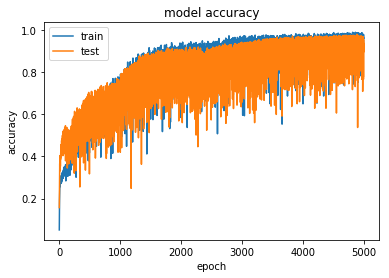

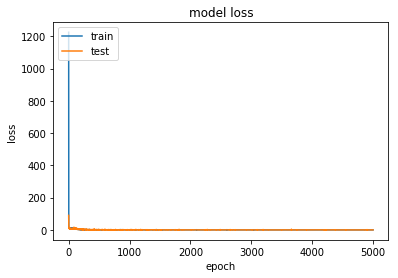

In [30]:
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])  # RAISE ERROR
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy vs epochs.png')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) #RAISE ERROR
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss vs epochs.png')
    plt.show()